In [84]:
!pip install kagglehub

In [27]:
!pip uninstall torch torchvision torchaudio

^C


In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


In [86]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("smaranjitghose/corn-or-maize-leaf-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\smaranjitghose\corn-or-maize-leaf-disease-dataset\versions\1


In [ ]:
!pip install vit-pytorch

  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached filelock-3.17.0-py3-none-any.whl (16 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Using cached sympy-1.13.3-py3-none-any.whl (6.2 MB)
Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl (15 kB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lpips 0.1.4 requires scipy>=1.0.1, which is not installed.
visdom 0.2.4 requires jsonpatch, which is not installed.
visdom 0.2.4 requires scipy, which is not installed.
visdom 0.2.4 requires websocket-client, which is not installed.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to the dataset
dataset_path = path

# List all the folders in the dataset
folders = os.listdir(dataset_path)

# Create directories for train and validation datasets
train_dir = 'D:\\PENELITIAN\\PENELITIAN - DIASH\\data\\train_dataset'
val_dir = 'D:\\PENELITIAN\\PENELITIAN - DIASH\\data\\val_dataset'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split the dataset
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    images = os.listdir(folder_path)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Create subdirectories for each class in train and validation directories
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(val_dir, folder), exist_ok=True)
    
    # Move the images to the respective directories
    for image in train_images:
        shutil.move(os.path.join(folder_path, image), os.path.join(train_dir, folder, image))
    
    for image in val_images:
        shutil.move(os.path.join(folder_path, image), os.path.join(val_dir, folder, image))

print("Dataset has been split into training and validation datasets.")

Dataset has been split into training and validation datasets.


In [15]:
import torch
print(torch.cuda.is_available())  # Harus mengembalikan True jika CUDA tersedia


True


In [ ]:
import torch
torch.__version__

'2.5.1+cu121'

In [101]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [104]:
# Zufar's code

from vit_pytorch import ViT

v = ViT(
    image_size = 256,
    patch_size = 32,
    num_classes = 4,
    dim = 1024,
    depth = 6,
    heads = 16,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
)

img = torch.randn(1, 3, 256, 256)

preds = v(img) # (1, 1000)

v = v.to(device)

In [105]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(v.parameters(), lr=0.001, momentum=0.9)

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

train_dir = 'D:\\PENELITIAN\\PENELITIAN - DIASH\\data'
trainset = datasets.ImageFolder(train_dir, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=4)


<class 'torch.utils.data.dataloader.DataLoader'>


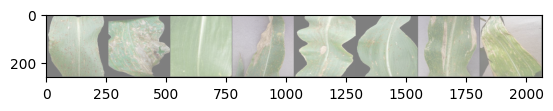

Common_Rust Common_Rust Healthy Blight Common_Rust Common_Rust Blight Gray_Leaf_Spot


In [57]:

import matplotlib.pyplot as plt
import numpy as np
import torchvision
print(DataLoader)

data_iter = iter(trainloader)
images, labels = next(data_iter)

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [ ]:
for i, data in tqdm(trainloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
    print(i)

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    # for i, data in enumerate(trainloader, 0):
    for i, data in tqdm(trainloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = i.to(device),data.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = v(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        # running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        #     running_loss = 0.0

print('Finished Training')

Epoch 20/20: 100%|██████████| 524/524 [00:15<00:00, 34.50it/s]

Finished Training


In [108]:
import torch
from tqdm import tqdm

num_epochs = 100

for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Loop untuk setiap batch dalam trainloader
    for i, data in tqdm(enumerate(trainloader, 0), desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = v(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Menghitung jumlah prediksi yang benar
        _, predicted = torch.max(outputs.data, 1)  # Ambil kelas dengan probabilitas tertinggi
        total += labels.size(0)  # Menambah jumlah data yang telah diproses
        correct += (predicted == labels).sum().item()  # Hitung prediksi yang benar

        # Statistik loss (jika perlu untuk debugging)
        # running_loss += loss.item()

    # Akurasi per epoch
    accuracy = 100 * correct / total  # Akurasi dalam persentase
    print(f'Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.2f}%')

print('Finished Training')


Epoch 1/100: 1047it [00:13, 79.14it/s]


Epoch [1/100], Accuracy: 83.05%


Epoch 2/100: 1047it [00:13, 78.27it/s]


Epoch [2/100], Accuracy: 85.36%


Epoch 3/100: 1047it [00:13, 78.03it/s]


Epoch [3/100], Accuracy: 87.92%


Epoch 4/100: 1047it [00:13, 78.17it/s]


Epoch [4/100], Accuracy: 89.57%


Epoch 5/100: 1047it [00:13, 77.07it/s]


Epoch [5/100], Accuracy: 91.07%


Epoch 6/100: 1047it [00:13, 77.09it/s]


Epoch [6/100], Accuracy: 92.24%


Epoch 7/100: 1047it [00:13, 77.19it/s]


Epoch [7/100], Accuracy: 93.67%


Epoch 8/100: 1047it [00:13, 76.20it/s]


Epoch [8/100], Accuracy: 94.05%


Epoch 9/100: 1047it [00:13, 77.30it/s]


Epoch [9/100], Accuracy: 95.75%


Epoch 10/100: 1047it [00:13, 76.45it/s]


Epoch [10/100], Accuracy: 96.08%


Epoch 11/100: 1047it [00:13, 77.32it/s]


Epoch [11/100], Accuracy: 97.28%


Epoch 12/100: 1047it [00:13, 78.40it/s]


Epoch [12/100], Accuracy: 96.47%


Epoch 13/100: 1047it [00:13, 76.97it/s]


Epoch [13/100], Accuracy: 97.35%


Epoch 14/100: 1047it [00:15, 67.47it/s]


Epoch [14/100], Accuracy: 97.90%


Epoch 15/100: 1047it [00:28, 37.01it/s]


Epoch [15/100], Accuracy: 97.71%


Epoch 16/100: 1047it [00:28, 36.78it/s]


Epoch [16/100], Accuracy: 97.21%


Epoch 17/100: 1047it [00:28, 37.07it/s]


Epoch [17/100], Accuracy: 98.52%


Epoch 18/100: 1047it [00:28, 36.85it/s]


Epoch [18/100], Accuracy: 98.59%


Epoch 19/100: 1047it [00:28, 37.04it/s]


Epoch [19/100], Accuracy: 98.02%


Epoch 20/100: 1047it [00:28, 36.77it/s]


Epoch [20/100], Accuracy: 98.90%


Epoch 21/100: 1047it [00:28, 36.86it/s]


Epoch [21/100], Accuracy: 98.52%


Epoch 22/100: 1047it [00:28, 36.58it/s]


Epoch [22/100], Accuracy: 98.71%


Epoch 23/100: 1047it [00:27, 37.40it/s]


Epoch [23/100], Accuracy: 99.02%


Epoch 24/100: 1047it [00:27, 37.50it/s]


Epoch [24/100], Accuracy: 99.12%


Epoch 25/100: 1047it [00:28, 36.91it/s]


Epoch [25/100], Accuracy: 99.55%


Epoch 26/100: 1047it [00:28, 36.80it/s]


Epoch [26/100], Accuracy: 99.36%


Epoch 27/100: 1047it [00:28, 36.86it/s]


Epoch [27/100], Accuracy: 99.12%


Epoch 28/100: 1047it [00:28, 37.38it/s]


Epoch [28/100], Accuracy: 99.62%


Epoch 29/100: 1047it [00:27, 37.60it/s]


Epoch [29/100], Accuracy: 99.36%


Epoch 30/100: 1047it [00:18, 58.08it/s]


Epoch [30/100], Accuracy: 99.21%


Epoch 31/100: 1047it [00:13, 77.11it/s]


Epoch [31/100], Accuracy: 99.43%


Epoch 32/100: 1047it [00:23, 44.07it/s]


Epoch [32/100], Accuracy: 99.69%


Epoch 33/100: 1047it [00:14, 73.77it/s]


Epoch [33/100], Accuracy: 99.55%


Epoch 34/100: 1047it [00:13, 76.70it/s]


Epoch [34/100], Accuracy: 99.69%


Epoch 35/100: 1047it [00:13, 79.30it/s]


Epoch [35/100], Accuracy: 99.81%


Epoch 36/100: 1047it [00:13, 75.34it/s]


Epoch [36/100], Accuracy: 99.57%


Epoch 37/100: 1047it [00:13, 79.25it/s]


Epoch [37/100], Accuracy: 99.69%


Epoch 38/100: 1047it [00:13, 80.02it/s]


Epoch [38/100], Accuracy: 99.67%


Epoch 39/100: 1047it [00:13, 80.01it/s]


Epoch [39/100], Accuracy: 99.71%


Epoch 40/100: 1047it [00:13, 79.04it/s]


Epoch [40/100], Accuracy: 99.71%


Epoch 41/100: 1047it [00:13, 79.04it/s]


Epoch [41/100], Accuracy: 99.81%


Epoch 42/100: 1047it [00:13, 79.17it/s]


Epoch [42/100], Accuracy: 99.69%


Epoch 43/100: 1047it [00:13, 75.68it/s]


Epoch [43/100], Accuracy: 99.86%


Epoch 44/100: 1047it [00:13, 75.98it/s]


Epoch [44/100], Accuracy: 99.90%


Epoch 45/100: 1047it [00:13, 76.88it/s]


Epoch [45/100], Accuracy: 99.83%


Epoch 46/100: 1047it [00:14, 73.61it/s]


Epoch [46/100], Accuracy: 99.86%


Epoch 47/100: 1047it [00:13, 77.38it/s]


Epoch [47/100], Accuracy: 99.88%


Epoch 48/100: 1047it [00:13, 77.03it/s]


Epoch [48/100], Accuracy: 99.93%


Epoch 49/100: 1047it [00:13, 77.35it/s]


Epoch [49/100], Accuracy: 99.88%


Epoch 50/100: 1047it [00:13, 76.65it/s]


Epoch [50/100], Accuracy: 99.90%


Epoch 51/100: 1047it [00:13, 78.14it/s]


Epoch [51/100], Accuracy: 99.86%


Epoch 52/100: 1047it [00:13, 78.18it/s]


Epoch [52/100], Accuracy: 99.88%


Epoch 53/100: 1047it [00:13, 76.23it/s]


Epoch [53/100], Accuracy: 99.86%


Epoch 54/100: 1047it [00:13, 79.29it/s]


Epoch [54/100], Accuracy: 99.88%


Epoch 55/100: 1047it [00:13, 79.63it/s]


Epoch [55/100], Accuracy: 99.90%


Epoch 56/100: 1047it [00:13, 78.18it/s]


Epoch [56/100], Accuracy: 99.81%


Epoch 57/100: 1047it [00:13, 77.82it/s]


Epoch [57/100], Accuracy: 99.93%


Epoch 58/100: 1047it [00:13, 79.56it/s]


Epoch [58/100], Accuracy: 99.90%


Epoch 59/100: 1047it [00:13, 79.39it/s]


Epoch [59/100], Accuracy: 99.90%


Epoch 60/100: 1047it [00:13, 79.29it/s]


Epoch [60/100], Accuracy: 99.93%


Epoch 61/100: 1047it [00:13, 79.02it/s]


Epoch [61/100], Accuracy: 99.88%


Epoch 62/100: 1047it [00:13, 76.97it/s]


Epoch [62/100], Accuracy: 99.88%


Epoch 63/100: 1047it [00:13, 76.43it/s]


Epoch [63/100], Accuracy: 99.95%


Epoch 64/100: 1047it [00:13, 76.73it/s]


Epoch [64/100], Accuracy: 99.81%


Epoch 65/100: 1047it [00:13, 78.02it/s]


Epoch [65/100], Accuracy: 99.86%


Epoch 66/100: 1047it [00:13, 77.03it/s]


Epoch [66/100], Accuracy: 99.90%


Epoch 67/100: 1047it [00:13, 77.90it/s]


Epoch [67/100], Accuracy: 99.90%


Epoch 68/100: 1047it [00:13, 78.34it/s]


Epoch [68/100], Accuracy: 99.93%


Epoch 69/100: 1047it [00:13, 80.27it/s]


Epoch [69/100], Accuracy: 99.88%


Epoch 70/100: 1047it [00:13, 78.31it/s]


Epoch [70/100], Accuracy: 99.88%


Epoch 71/100: 1047it [00:13, 78.17it/s]


Epoch [71/100], Accuracy: 99.88%


Epoch 72/100: 1047it [00:13, 79.64it/s]


Epoch [72/100], Accuracy: 99.90%


Epoch 73/100: 1047it [00:13, 78.63it/s]


Epoch [73/100], Accuracy: 99.93%


Epoch 74/100: 1047it [00:13, 78.36it/s]


Epoch [74/100], Accuracy: 99.93%


Epoch 75/100: 1047it [00:13, 78.18it/s]


Epoch [75/100], Accuracy: 99.88%


Epoch 76/100: 1047it [00:13, 78.74it/s]


Epoch [76/100], Accuracy: 99.88%


Epoch 77/100: 1047it [00:13, 78.85it/s]


Epoch [77/100], Accuracy: 99.90%


Epoch 78/100: 1047it [00:13, 79.87it/s]


Epoch [78/100], Accuracy: 99.79%


Epoch 79/100: 1047it [00:13, 77.04it/s]


Epoch [79/100], Accuracy: 99.93%


Epoch 80/100: 1047it [00:13, 76.28it/s]


Epoch [80/100], Accuracy: 99.90%


Epoch 81/100: 1047it [00:13, 77.58it/s]


Epoch [81/100], Accuracy: 99.93%


Epoch 82/100: 1047it [00:13, 77.26it/s]


Epoch [82/100], Accuracy: 99.88%


Epoch 83/100: 1047it [00:13, 78.30it/s]


Epoch [83/100], Accuracy: 99.88%


Epoch 84/100: 1047it [00:13, 77.53it/s]


Epoch [84/100], Accuracy: 99.93%


Epoch 85/100: 1047it [00:13, 77.01it/s]


Epoch [85/100], Accuracy: 99.90%


Epoch 86/100: 1047it [00:13, 79.33it/s]


Epoch [86/100], Accuracy: 99.86%


Epoch 87/100: 1047it [00:13, 78.28it/s]


Epoch [87/100], Accuracy: 99.93%


Epoch 88/100: 1047it [00:13, 77.62it/s]


Epoch [88/100], Accuracy: 99.90%


Epoch 89/100: 1047it [00:13, 78.96it/s]


Epoch [89/100], Accuracy: 99.93%


Epoch 90/100: 1047it [00:13, 78.34it/s]


Epoch [90/100], Accuracy: 99.95%


Epoch 91/100: 1047it [00:13, 78.52it/s]


Epoch [91/100], Accuracy: 99.93%


Epoch 92/100: 1047it [00:13, 78.92it/s]


Epoch [92/100], Accuracy: 99.88%


Epoch 93/100: 1047it [00:13, 78.74it/s]


Epoch [93/100], Accuracy: 99.86%


Epoch 94/100: 1047it [00:13, 78.79it/s]


Epoch [94/100], Accuracy: 99.90%


Epoch 95/100: 1047it [00:13, 78.69it/s]


Epoch [95/100], Accuracy: 99.88%


Epoch 96/100: 1047it [00:13, 77.33it/s]


Epoch [96/100], Accuracy: 99.90%


Epoch 97/100: 1047it [00:13, 76.41it/s]


Epoch [97/100], Accuracy: 99.93%


Epoch 98/100: 1047it [00:13, 75.46it/s]


Epoch [98/100], Accuracy: 99.93%


Epoch 99/100: 1047it [00:13, 77.88it/s]


Epoch [99/100], Accuracy: 99.98%


Epoch 100/100: 1047it [00:13, 76.96it/s]

Epoch [100/100], Accuracy: 99.90%
Finished Training


In [95]:
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
test_dir = 'D:\\PENELITIAN\\PENELITIAN - DIASH\\test'
testset = datasets.ImageFolder(test_dir, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                         shuffle=False, num_workers=2)

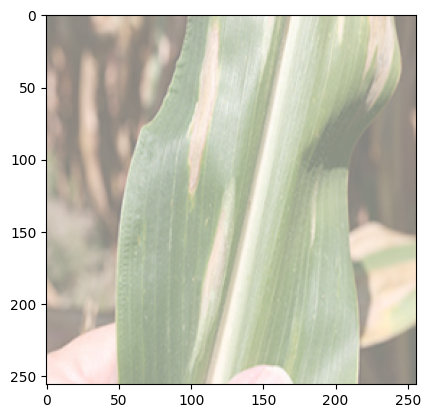

tensor([0])


In [96]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

data_iter = iter(testloader)
images, labels = next(data_iter)
images, labels = next(data_iter)
images, labels = next(data_iter)
images, labels = next(data_iter)

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [103]:
# prepare to count predictions for each class
classes = (['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy'])
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = v(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    # print(classname,correct_count)

Accuracy for class: Blight is 1.1 %
Accuracy for class: Common_Rust is 99.4 %
Accuracy for class: Gray_Leaf_Spot is 0.0 %
Accuracy for class: Healthy is 0.3 %


In [109]:
PATH = './ViT2.pth'
torch.save(v.state_dict(), PATH)